In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [175]:

def sign(t):
    return (-1)**(t < 0)



def Perceptron(X, y, ln=0.001, iters=1000):    
    theta = np.random.randn(len(X[0]))

    for i in range(iters):
        y_predicted = sign(X @ theta)

        # converge, all points are classified correctly
        if np.all(y == y_predicted):
            print('break')
            break
        
        for i in range(len(X)):
            if (y[i] * sign(X[i] @ theta)) < 0:
                theta += ln * y[i] * X[i]

    return theta


break


array([-0.6375746 ,  0.63875947,  0.93325438])

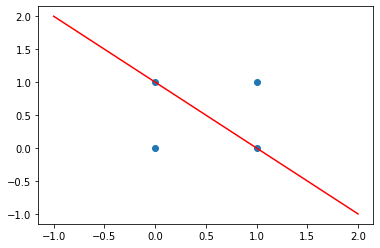

In [176]:
# OR Function
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])
y = np.array([-1, 1, 1, 1])

theta_hat = Perceptron(np.c_[np.ones(len(X)), X], y)

# plot
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
x = np.linspace(-1, 2, 100)
y = -(theta_hat[0] + theta_hat[1] * x)/theta_hat[1]
ax.plot(x, y, c='r')

theta_hat

In [177]:
# load data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']


In [178]:
X[:2]

array([[  17.99    ,   10.38    ,  122.8     , 1001.      ,    0.1184  ,
           0.2776  ,    0.3001  ,    0.1471  ,    0.2419  ,    0.07871 ,
           1.095   ,    0.9053  ,    8.589   ,  153.4     ,    0.006399,
           0.04904 ,    0.05373 ,    0.01587 ,    0.03003 ,    0.006193,
          25.38    ,   17.33    ,  184.6     , 2019.      ,    0.1622  ,
           0.6656  ,    0.7119  ,    0.2654  ,    0.4601  ,    0.1189  ],
       [  20.57    ,   17.77    ,  132.9     , 1326.      ,    0.08474 ,
           0.07864 ,    0.0869  ,    0.07017 ,    0.1812  ,    0.05667 ,
           0.5435  ,    0.7339  ,    3.398   ,   74.08    ,    0.005225,
           0.01308 ,    0.0186  ,    0.0134  ,    0.01389 ,    0.003532,
          24.99    ,   23.41    ,  158.8     , 1956.      ,    0.1238  ,
           0.1866  ,    0.2416  ,    0.186   ,    0.275   ,    0.08902 ]])

In [179]:
np.unique(y)

array([0, 1])

In [180]:
def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd

X = standard_scaler(X)
intercept_X = np.c_[np.ones(len(X)), X]
y[ y == 0 ] = -1

theta_hat = Perceptron(intercept_X, y)

# accuracy
np.mean(sign(intercept_X @ theta_hat) == y)


0.984182776801406